EDA work

In [2]:
#necessary libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [3]:
#reading the txt file 
dataframe=pd.read_csv('dataset.txt',sep= ",",header=None)
dataframe.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
dataframe.shape

(97, 2)

In [5]:
X=np.array(dataframe[0])
x=X.reshape(-1,1)    #making 2D array

In [6]:
Y=np.array(dataframe[1])
y=Y.reshape(-1,1)     #making 2D array

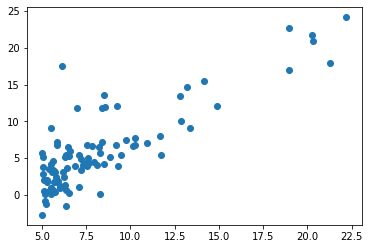

In [7]:
#seeing the distribution
plt.scatter(X,Y)

Algo apply

In [8]:
#Implementing Linear Regression to see th slope and intercept value which we have to optimize

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
LR.intercept_  #note that value for checking

array([-3.89578088])

In [10]:
LR.coef_     #note that value for checking

array([[1.19303364]])

In [35]:
'''
Batch Gradient functions
For Large dataset it is costly as it take a single sample and calculate slope and intercept which are costs in our equation,
It can give good optimized error rate but make sure to use it in small dataset, but is fast compared to Stochastic Gradient
as you see there are only 97 rows
'''   


def cal_cost(theta,x_data,y_data):
    '''
    this function calculates the cost, formula is [1/(2*total rows)*]summation[(yi-y`)]
    '''
    length=len(x_data)
    prediction=x_data.dot(theta)   #dot product of x_values and theta which we take
    cost=(1/2*length)*np.sum(np.square(prediction-y_data))
    return cost

   
def Batch_Gradient_function(x_data,y_data,theta,learning_rate=0.001,iteration=100):
    t1=time.time()
    
    
    length=len(x_data)
    cost_history=np.zeros(iteration)
    theta_history=np.zeros((iteration,2))
    for i in range(iteration):
        prediction=np.dot(x_data,theta)
        theta=theta-(1/length)*learning_rate*(x_data.T.dot((prediction-y_data)))
        theta_history[i,:]=theta.T
        cost_history[i]=cal_cost(theta,x_data,y_data)
    t2=time.time()    
    print("time consumed {} ms".format(t2-t1)) 
    
        
    
    return theta,cost_history,theta_history
    
   

In [36]:

'''
Running the Batch Gradient function
'''
iteration=2700
theta=np.random.randn(2,1)    
x_b=np.c_[np.ones((len(x),1)),x]


print("Batch_Gradient")

theta,cost_history,theta_history=Batch_Gradient_function(x_b,y,theta,0.005,iteration)
print("Theta0:{},\n Theta1:{}".format(theta[0][0],theta[1][0]))
print("final cost {}".format(cost_history[-1]))



Batch_Gradient
time consumed 0.03790020942687988 ms
Theta0:-3.506279850555279,
 Theta1:1.1539040411044974
final cost 42253.777823978664


Please note that we have reached the same slope and intercept value just like the algorithm did above

intercept value is -3.89578088

slope is 1.1605783160721899

We need 2500 iterations to reach the value

# Let's plot the cost_history over epochs

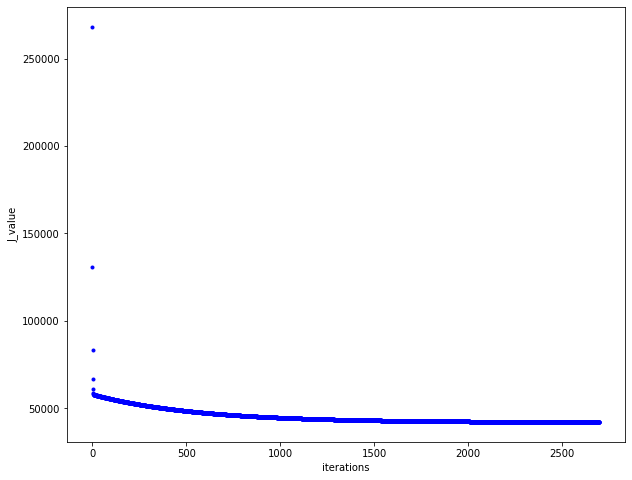

In [42]:
fig,axis=plt.subplots(figsize=(10,8))
axis.set_ylabel('J_value')
axis.set_xlabel('iterations')
_=axis.plot(range(iteration),cost_history,'b.')

see after 2500 it reaches it's convergence

# Stochastic Gradient Descent

In [37]:



def Stochastic_function(x_data,y_data,theta,learning_rate=0.001,iteration=1000):
    '''
     SGD randomly picks one data point from the whole data set at each iteration to reduce the computations enormously
     It is also common to sample a small number of data points instead of just one point at each step.
    
    
'''
    t3=time.time()
    length=len(x_data)
    cost_history=np.zeros(iteration)
    for i in range(iteration):
        cost=0.0
        for i in range(length):
            rand_ind=np.random.randint(0,length)
            x_i=x_data[rand_ind,:].reshape(1,x_data.shape[1])
            y_i=y_data[rand_ind].reshape(1,1)
            prediction=np.dot(x_i,theta)
            theta=theta-(1/length)*learning_rate*(x_i.T.dot((prediction-y_i)))
            cost=cost+cal_cost(theta,x_i,y_i)
        cost_history[i]=cost
    t4=time.time()
    print("time consumed {} ms".format(t4-t3))
    return theta,cost_history
    
        

In [38]:
iteration=100
theta=np.random.randn(2,1)    
x_b=np.c_[np.ones((len(x),1)),x]

theta,cost_history=Stochastic_function(x_b,y,theta,0.001,iteration)
print("Theta0:{},\n Theta1:{}".format(theta[0][0],theta[1][0]))
print("final cost {}".format(cost_history[-1]))



time consumed 0.21443533897399902 ms
Theta0:-0.3263433476371238,
 Theta1:0.850578297088458
final cost 0.0


Theta0 and Theta1 is not cope up with the original algorithm

Batch Gradient is faster than Stochastic gradient near about 0.2 ms upon a dataset consisting near about 100 rows, 2 features
